# 0.) Import the US Perminent Visas using zip extractor

In [18]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [5]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [8]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [6]:
df_select = df[['class_of_admission','case_status','pw_level_9089','agent_state','application_type']]

# 3.) Clean your data for a decision tree


In [21]:
x=pd.get_dummies(df_select,drop_first = True, prefix=['class_of_admission','agent_state','application_type','pw_level_9089'],columns=['class_of_admission','agent_state','application_type','pw_level_9089'])
x

,case_status,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,class_of_admission_E-1,...,agent_state_WEST VIRGINIA,agent_state_WI,agent_state_WISCONSIN,agent_state_WV,agent_state_WY,application_type_ONLINE,application_type_PERM,pw_level_9089_Level II,pw_level_9089_Level III,pw_level_9089_Level IV
0,Certified,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Denied,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Certified,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Certified,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,Certified,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,Withdrawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
374358,Withdrawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
374359,Withdrawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
374360,Withdrawn,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
x.isnull().sum()

case_status                    0
class_of_admission_A1/A2       0
class_of_admission_AOS         0
class_of_admission_AOS/H-1B    0
class_of_admission_B-1         0
                              ..
application_type_ONLINE        0
application_type_PERM          0
pw_level_9089_Level II         0
pw_level_9089_Level III        0
pw_level_9089_Level IV         0
Length: 169, dtype: int64

In [23]:
x=x.drop('case_status',axis=1)
x

,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,class_of_admission_E-1,class_of_admission_E-2,...,agent_state_WEST VIRGINIA,agent_state_WI,agent_state_WISCONSIN,agent_state_WV,agent_state_WY,application_type_ONLINE,application_type_PERM,pw_level_9089_Level II,pw_level_9089_Level III,pw_level_9089_Level IV
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
374358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
374359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
374360,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
y=df_select['case_status']
y

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

# 4.) Fit and plot a decision tree of depth 3


In [25]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x,y)

[Text(0.5, 0.875, 'application_type_PERM <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.25, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.597\nsamples = 353786\nvalue = [170126, 143859, 22964, 16837]'),
 Text(0.125, 0.375, 'class_of_admission_L-1 <= 0.5\ngini = 0.638\nsamples = 87056\nvalue = [40595, 31037, 10145, 5279]'),
 Text(0.0625, 0.125, 'gini = 0.656\nsamples = 67683\nvalue = [30972, 22403, 9636, 4672]'),
 Text(0.1875, 0.125, 'gini = 0.553\nsamples = 19373\nvalue = [9623, 8634, 509, 607]'),
 Text(0.375, 0.375, 'application_type_ONLINE <= 0.5\ngini = 0.581\nsamples = 266730\nvalue = [129531, 112822, 12819, 11558]'),
 Text(0.3125, 0.125, 'gini = 0.564\nsamples = 174884\nvalue = [88945, 72998, 6692, 6249]'),
 Text(0.4375, 0.125, 'gini = 0.609\nsamples = 91846\nvalue = [40586, 39824, 6127, 5309]'),
 Text(0.75, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.597\nsamples = 20576\nvalue = [11807, 4727, 2685, 1357]'),
 Text(0.625, 0.375, '

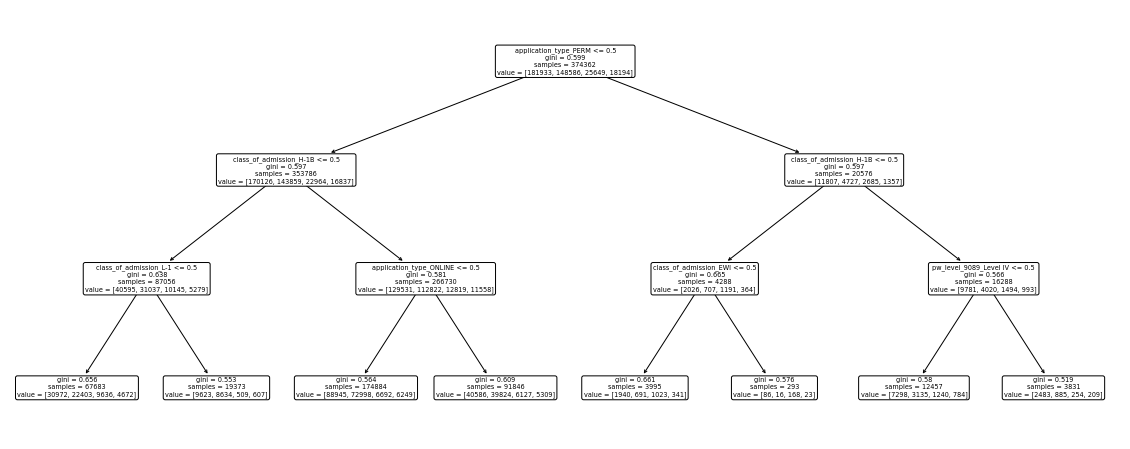

In [26]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, max_depth = 3, rounded = True, feature_names=x.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [29]:
print(df_select['application_type'].unique())
print(df_select['class_of_admission'].unique())
print(y.unique())

['PERM' 'ONLINE' 'MAILEDIN' nan]
['J-1' 'B-2' 'H-1B' 'L-1' 'EWI' 'E-2' nan 'E-1' 'H-2B' 'TPS' 'F-1' 'B-1'
 'C-1' 'Not in USA' 'TN' 'H-4' 'O-1' 'R-1' 'L-2' 'Q' 'F-2' 'H-1B1'
 'Parolee' 'G-5' 'E-3' 'H-2A' 'VWT' 'P-1' 'A1/A2' 'D-1' 'A-3' 'R-2' 'H-1C'
 'H-3' 'J-2' 'P-4' 'I' 'H-1A' 'G-1' 'VWB' 'G-4' 'P-3' 'AOS/H-1B' 'O-3'
 'Parol' 'O-2' 'H1B' 'N' 'T-1' 'TD' 'M-1' 'K-1' 'U-1' 'AOS' 'P-2' 'C-3'
 'V-2' 'M-2']
['Certified' 'Denied' 'Certified-Expired' 'Withdrawn']


In [30]:
## we can see that the largest node is the third box from the left which has 174884 samples. 
## We can interpret it as the group that has  MAILEDIN application type and H-1B class of admission.
## it's also the group that has the most certified category regarding the first values in the bracket 
## which is 88945. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
output =[]
max_depths=[1,2,3]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
for i in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, y_train)
    ypredict = clf.predict(X_test)
    accuracy = accuracy_score(y_test, ypredict)
    output.append(accuracy)
    
output

[0.48700460337105667, 0.48700460337105667, 0.4872806275543367]

In [34]:
## from the accuracy list , we can see that the best max depth are 3